### Análisis de temperatura global

In [1]:
# instalación de librerías poco frecuentes
!pip install geopy
!pip install geopandas  # Permite graficar bases de datos de datos geoespaciales
!pip install pycountry-convert # Convierte nombres de pais a código ISO3166-1 alpha2 o ISO3166-1 alpha3

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

     |████████████████████████████████| 118 kB 13.7 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 10.1 MB 32.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=5bd6e7cb9bff95bfa51be8dcf28df8d9d2df528e534a1d02854519b21f8b4e06
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## 1) Data Cleaning
+ Eliminar la columna State
+ Convertir a Celsius la columna AvgTemperature
+ Hacer limpieza de la base de datos: eliminar todas las entradas que contengan valores nulos

In [2]:
data = pd.read_csv('city_temperature.csv') # Leyendo la base de datos

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.info() # información del data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [4]:
data.drop('State', axis=1, inplace= True,) # Elimina columna State

In [5]:
data.AvgTemperature = (data.AvgTemperature-32)*(5/9) # Convirtiendo de Farenheit a Celsius 

#### **Usamos la variación termica y las bajas temperaturas medias como criterio para hacer data cleaning**

In [6]:
# Eliminar datos con temperatura promedio menor a -50 (data cleaning)
data.drop(data[(data.AvgTemperature <-50)].index, inplace = True) 

<AxesSubplot:xlabel='AvgTemperature', ylabel='Count'>

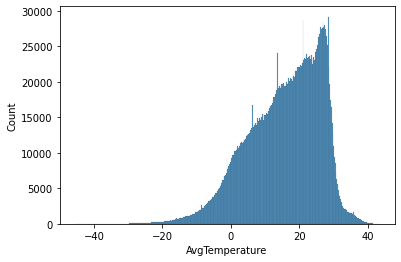

In [7]:
sns.histplot(data.AvgTemperature) # Conociendo la dristribución de los datos de temperatura

In [8]:
data.isnull().sum() # Conociendo cantidad de datos nulos

Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [9]:
data

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.888889
1,Africa,Algeria,Algiers,1,2,1995,9.666667
2,Africa,Algeria,Algiers,1,3,1995,9.333333
3,Africa,Algeria,Algiers,1,4,1995,8.000000
4,Africa,Algeria,Algiers,1,5,1995,8.833333
...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,28.000000
2906323,North America,US,San Juan Puerto Rico,7,28,2013,27.555556
2906324,North America,US,San Juan Puerto Rico,7,29,2013,29.000000
2906325,North America,US,San Juan Puerto Rico,7,30,2013,28.777778


In [10]:
data.Region.value_counts()

North America                        1548160
Europe                                368702
Asia                                  306163
Africa                                220919
South/Central America & Carribean     206691
Middle East                           120811
Australia/South Pacific                55209
Name: Region, dtype: int64

## 2) Hacer una segunda tabla
- Crear una segunda tabla y guardarla como .csv con las columnas: ciudad, país, temperatura anual promedio, variación térmica anual (mayor diferencia entre mayor y menor temperatura anual)
- Organizar la base de datos en orden ascendente de mayor temperatura promedio a menor temperatura promedio

In [11]:
df = pd.DataFrame()
grouped = data.groupby(['Country','City','Year']).AvgTemperature # Variable auxiliar de agrupación

df['MeanTemperature'] = grouped.mean()  # Crea columna MeanTemperature
df['TemperatureVariation'] = grouped.max()-grouped.min()  # Crea columna TemperatureVariation

del grouped
df.reset_index(inplace = True)
df.sort_values(by = 'MeanTemperature', ascending= True)

,Country,City,Year,MeanTemperature,TemperatureVariation
4984,US,Fairbanks,2020,-13.182007,57.722222
2449,Mongolia,Ulan-bator,2020,-8.099088,47.166667
791,Canada,Winnipeg,2014,-6.003106,56.888889
623,Canada,Edmonton,2015,-4.714286,36.222222
731,Canada,Regina,2020,-4.575041,45.055556
...,...,...,...,...,...
1577,Haiti,Port au Prince,1997,30.795238,8.833333
1582,Haiti,Port au Prince,2003,30.837325,10.222222
2679,Nigeria,Niamey,2020,30.871891,18.722222
1092,Cyprus,Nicosia,2010,32.277778,0.000000


In [12]:
# Elimina entradas cuya variación térmica sea nula (data cleaning)
df.drop(df[df['TemperatureVariation'] == 0].index, inplace = True)  

In [13]:
# Organiza las entradas por su variación térmica de mayor a menor
df.sort_values(by = 'TemperatureVariation', ascending= False) 

,Country,City,Year,MeanTemperature,TemperatureVariation
4963,US,Fairbanks,1999,-4.347375,69.000000
4981,US,Fairbanks,2017,-0.995129,68.055556
4977,US,Fairbanks,2013,-1.661187,67.611111
4961,US,Fairbanks,1997,-1.735312,67.000000
4976,US,Fairbanks,2012,-4.156193,66.555556
...,...,...,...,...,...
1520,Guinea,Conakry,1998,28.681818,3.777778
323,Barbados,Bridgetown,2018,26.199041,3.611111
576,Burundi,Bujumbura,1998,28.000000,3.333333
1251,Ethiopia,Addis Ababa,2003,17.861111,1.722222


In [14]:
# Guardando el dataframe como archivo csv
df.sort_values(by = 'MeanTemperature', ascending= True).to_csv("variacion_termica.csv", index = False )

## 3) Graficar
+ Hacer gráfico de un mapa de calor de las ciudades con mayor variación térmica a lo largo del último año registrado en a base de datos (sino se puede hacer el mapa por ciudades, hacerlo por países)

+ Establecer las cinco ciudades con mayor variación térmica anual, y menor variación y hacer una gráfica por cada ciudad mostrando como ha cambiado esta variación a lo largo del periodo de tiempo cubierto por la base de datos. Mostrar los resultados en una misma gráfica con subgráficas.

In [15]:
# Tomando los valores del último año para graficar un mapa de calor
mask = df.Year==df.Year.max()
df2 = df[mask].drop(['Year','City'], axis=1); del mask
df2 = df2.groupby('Country').MeanTemperature.mean().to_frame()
df2.reset_index(inplace= True)
df2

,Country,MeanTemperature
0,Albania,10.644279
1,Algeria,14.463516
2,Argentina,21.102405
3,Australia,20.398010
4,Austria,7.180348
...,...,...
103,Uruguay,20.458955
104,Uzbekistan,10.771144
105,Venezuela,26.812030
106,Vietnam,21.528192


In [16]:
# Intalando e importando librería que permite convertir nombre 
# de un país a codigo ISO 3166-1 alpha-3 

#!pip install pycountry-convert
from pycountry_convert import country_name_to_country_alpha3

In [17]:
def cod_country(col): # This funtion convert country name to country alpha 3 or 'Unknown'
    try:
        cn_a2_code =  country_name_to_country_alpha3(col)
    except:
        cn_a2_code = 'Unknown'  
    return cn_a2_code
cod_country_vec = np.vectorize(cod_country)

In [18]:
# Esta celda lista los paises que dan como resultado en su codigo 'Unknow'
serie0 = pd.Series(df2.Country.unique())
serie1 = serie0.apply(cod_country)
new_df = serie1.compare(serie0)
del(serie0,serie1)
new_df.columns =['codigos','paises']
new_df.loc[(new_df['codigos'] == "Unknown")]



,codigos,paises
26,Unknown,Equador
62,Unknown,Myanmar (Burma)
93,Unknown,The Netherlands
98,Unknown,US
107,Unknown,Yugoslavia


In [19]:
# Cambiandro nombres de paises por aceptados en la función country_name_to_country_alpha3
aux = new_df.loc[(new_df['codigos'] == "('Unknown',)")].paises.unique()
correcion = ['Ecuador','Myanmar','Netherlands','United States',np.nan]
dict1 = dict(zip(aux, correcion))   # Convirtiendo diccionario 
                                    # zip pone dos iterables uno a uno 
df.Country.map(dict1, na_action= 'ignore') # el método map convierte en nan 
                                           #cualquier otro valor que no se pase en el diccionario

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7959   NaN
7960   NaN
7961   NaN
7962   NaN
7963   NaN
Name: Country, Length: 7959, dtype: float64

In [20]:
# Cambiando nombres de paises por aceptados en la función country_name_to_country_alpha3
aux = new_df.loc[(new_df['codigos'] == "Unknown")].paises.unique()
correcion = ['Ecuador','Myanmar','Netherlands','United States',np.nan]
df2.Country.replace(aux,correcion, inplace=True) #Reemplazando nombres de algunos paises
del aux, correcion

In [21]:
# Esta celda lista los paises que dan como resultado en su codigo 'Unknow'
serie0 = pd.Series(df2.Country.unique())
serie1 = serie0.apply(cod_country)
new_df = serie1.compare(serie0)
del(serie0,serie1)
new_df.columns =['codigos','paises']
new_df.loc[(new_df['codigos'] == "Unknown")]



,codigos,paises
107,Unknown,NaN


In [22]:
df2.dropna(inplace=True)  #Elimina entradas con valores nulos
df2['country_code'] = df2.Country.apply(cod_country) #Crea columna country_code

#installation
#!pip install geopy
#function to get longitude and latitude data from country namefrom geopy.geocoders import Nominatimgeolocator = Nominatim()

from geopy.geocoders import Nominatim #nominatim is geolocator

def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = Nominatim(user_agent='z').geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan


Geolocate = np.vectorize(geolocate)
uni = df2.Country.unique()
latitude, longitude = Geolocate(uni)

df2['Latitud'] = df2['Country']
df2['Longitud'] = df2['Country']

df2.Latitud.replace(uni,latitude, inplace=True)
df2.Longitud.replace(uni,longitude, inplace=True)

df2['Latitud'] = df2['Latitud'].astype(str)
df2['Longitud'] = df2['Longitud'].astype(str)
df2['Location'] = df2['Latitud'].str.cat(df2['Longitud'], sep =",")
df2.head()


df2.drop(axis = 1, labels = ['Latitud', 'Longitud','Location'], inplace=True)

In [23]:
SHAPEFILE = 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['Country', 'country_code', 'geometry']
geo_df.drop(geo_df.loc[geo_df['Country'] == 'Antarctica'].index, inplace= True)
geo_df.head()

,Country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [24]:
df3 = gpd.GeoDataFrame(df2.merge(geo_df.drop('Country', axis=1),on = 'country_code', how='left',))
df3

,Country,MeanTemperature,country_code,geometry
0,Albania,10.644279,ALB,"POLYGON ((20.56715 41.87318, 20.54172 41.86158..."
1,Algeria,14.463516,DZA,"POLYGON ((-4.82161 24.99506, -4.99519 25.10209..."
2,Argentina,21.102405,ARG,"MULTIPOLYGON (((-67.19390 -22.82222, -67.14269..."
3,Australia,20.398010,AUS,"MULTIPOLYGON (((131.53590 -31.60556, 131.34555..."
4,Austria,7.180348,AUT,"POLYGON ((16.94504 48.60417, 16.95434 48.55740..."
...,...,...,...,...
102,United Kingdom,8.138267,GBR,"MULTIPOLYGON (((-7.24710 55.06932, -7.25674 55..."
103,Uruguay,20.458955,URY,"POLYGON ((-57.60279 -30.19052, -57.58684 -30.2..."
104,Uzbekistan,10.771144,UZB,"MULTIPOLYGON (((71.78552 39.98970, 71.78976 39..."
105,Venezuela,26.812030,VEN,"MULTIPOLYGON (((-60.02099 8.55801, -59.95969 8..."


In [25]:
df3[df3.country_code.isna()] # Verificando datos nulos

,Country,MeanTemperature,country_code,geometry


In [26]:
df3 = gpd.GeoDataFrame(df2.drop('Country', axis = 1).merge(
    geo_df,on = 'country_code', how='right')) # DataFrame con todos los paises de la imagen
df3['Temperatura normalizada'] = (df3.MeanTemperature-df3.MeanTemperature.min())/(df3.MeanTemperature.max()-df3.MeanTemperature.min())


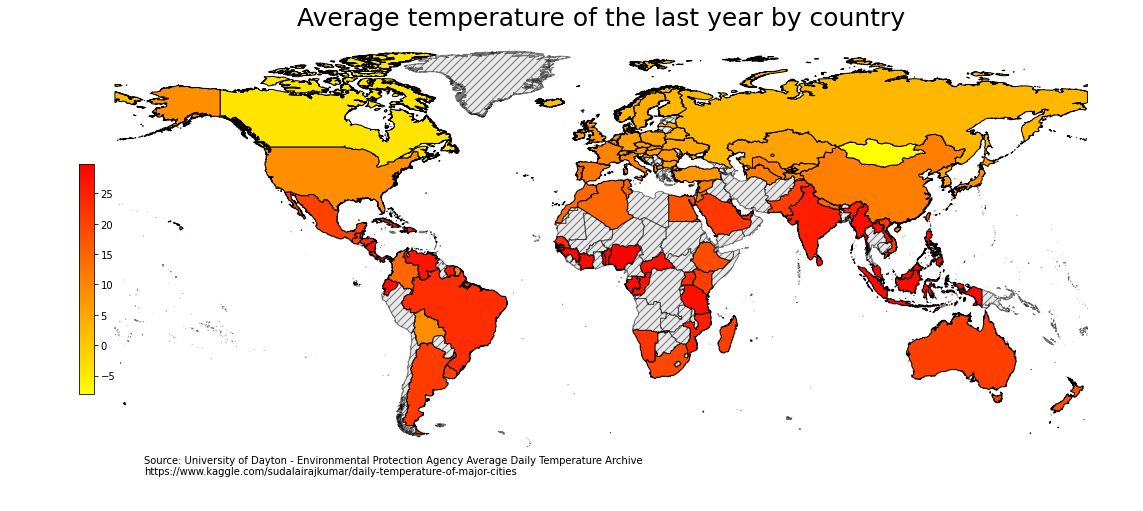

In [27]:
df_= df3
col = 'MeanTemperature'
title = 'Average temperature of the last year by country'
source = """Source: University of Dayton - Environmental Protection Agency Average Daily Temperature Archive
https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities"""
vmax, vmin = df_[col].max(), df_[col].min()
cmap = 'autumn_r'

fig, ax = plt.subplots(1, figsize=(20, 8))

ax.axis('off')
df_.plot(column = col, ax = ax, cmap= cmap, linewidth=1, edgecolor= 'k', figsize =(15, 6),
        missing_kwds={
                        "color": "lightgrey",
#                        "edgecolor": "red",
                        "hatch": "///",
                        "label": "Missing values",
                        'alpha': 0.5})

ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, 0.06), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Escala de color
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap= cmap)

cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

plt.show()

In [28]:
menor = df.groupby('City').TemperatureVariation.mean().sort_values(ascending = True).iloc[0:5].index
mayor = df.groupby('City').TemperatureVariation.mean().sort_values(ascending = True).iloc[-5::1].index
print(menor, mayor)

Index(['Bridgetown', 'Kuala Lumpur', 'Singapore', 'Bogota', 'Jakarta'], dtype='object', name='City') Index(['Fargo', 'Regina', 'Winnipeg', 'Ulan-bator', 'Fairbanks'], dtype='object', name='City')


In [29]:
df4 = df.groupby(['City','Year'], as_index=True).TemperatureVariation.mean()[menor.append(mayor)].reset_index()
#df4.Year.min(), df4.Year.max()

In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  252 non-null    object 
 1   Year                  252 non-null    int64  
 2   TemperatureVariation  252 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [31]:
df4 = df4.pivot(index='Year', columns= 'City')

In [32]:
df4.loc[:,('TemperatureVariation', menor)]

TemperatureVariation                                           
City           Bridgetown Kuala Lumpur Singapore    Bogota   Jakarta
Year                                                                
1995             6.777778     6.222222  7.055556  6.444444  7.222222
1996             5.611111     6.277778  5.888889  6.555556  9.111111
1997             4.666667     5.500000  5.666667  8.888889  7.722222
1998             4.722222     7.055556  7.111111  9.611111  7.555556
1999             5.833333     5.388889  6.500000  9.444444  6.833333
2000             5.611111     6.944444  6.111111  9.000000  7.666667
2001             5.277778     4.555556  6.666667  7.555556  5.722222
2002             4.888889     5.388889  6.388889  6.277778  6.722222
2003             5.222222     4.388889  6.000000  7.277778  7.166667
2004             6.333333     4.944444  6.500000  6.277778  8.000000
2005             6.000000     5.888889  6.611111  6.277778  5.666667
2006             5.944444     5.111111  6.222222  7.944444  6.444444
2007             4.666667     5.666667  6.000000  6.777778  6.166667
2008             5.333333     6.500000  6.666667  5.444444  6.500000
2009             4.277778     6.722222  5.888889  5.277778  6.777778
2010             5.055556     6.000000  5.777778  6.055556  5.611111
2011             5.333333     6.944444  7.000000  4.833333  5.500000
2012             4.611111     5.888889  5.333333  4.111111  5.333333
2013             4.611111     6.055556  6.500000  4.777778  6.833333
2014             4.722222     6.888889  6.388889  3.777778  6.888889
2015             5.277778     6.166667  5.555556  4.388889  6.277778
2016             5.111111     6.388889  5.833333  5.611111  5.666667
2017             4.888889     6.833333  6.055556  5.055556  5.000000
2018             3.611111     7.944444  7.722222  6.611111  6.555556
2019                  NaN     6.277778  6.944444  4.944444  5.388889
2020                  NaN     6.000000  5.222222  5.055556  5.055556

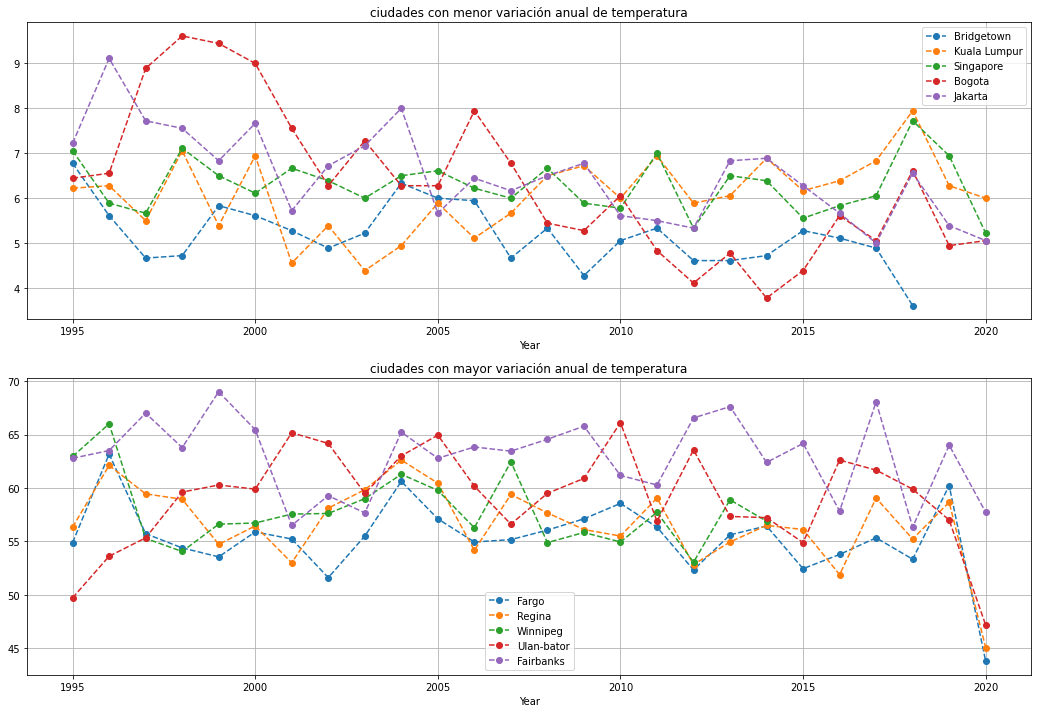

In [34]:
fig,ax = plt.subplots(2,1, figsize=(18,12))

df4.loc[:,('TemperatureVariation', menor)].plot( ax = ax[0], kind = 'line', 
        linestyle = '--', marker = 'o', title = 'ciudades con menor variación anual de temperatura',
        )
#sns.lineplot(data = df4.loc[:,('TemperatureVariation', menor)], ax = ax[0])
ax[0].grid()
ax[0].legend(labels=menor)

df4.loc[:,('TemperatureVariation', mayor)].plot( ax = ax[1], kind = 'line', 
        linestyle = '--', marker = 'o', title = 'ciudades con mayor variación anual de temperatura')
ax[1].grid()
ax[1].legend(mayor)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e24f7876-4ca4-47d4-a82e-3b4f6c14894f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>